In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from scipy.stats import chi2_contingency

import optuna
import joblib
import pickle


In [2]:
path = '/kaggle/input/bank-dataset-asah/' 


for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-dataset-asah/bank-additional-full.csv


In [3]:
df = pd.read_csv(path + 'bank-additional-full.csv', sep=';')
print(f"Total data: {len(df)}")

Total data: 41188


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()
     

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.duplicated().sum()
     

12

In [9]:
df['pdays'].unique()


array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [10]:
df['pdays'].value_counts()


pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [11]:


def eda_univariate_numeric(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)

    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(16, 6 * num_rows))

    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.histplot(df[col], kde=True, bins=30,palette='Set3')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_47/3810888341.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_47/3810888341.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30,palette='Set3')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_47/3810888341.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[c

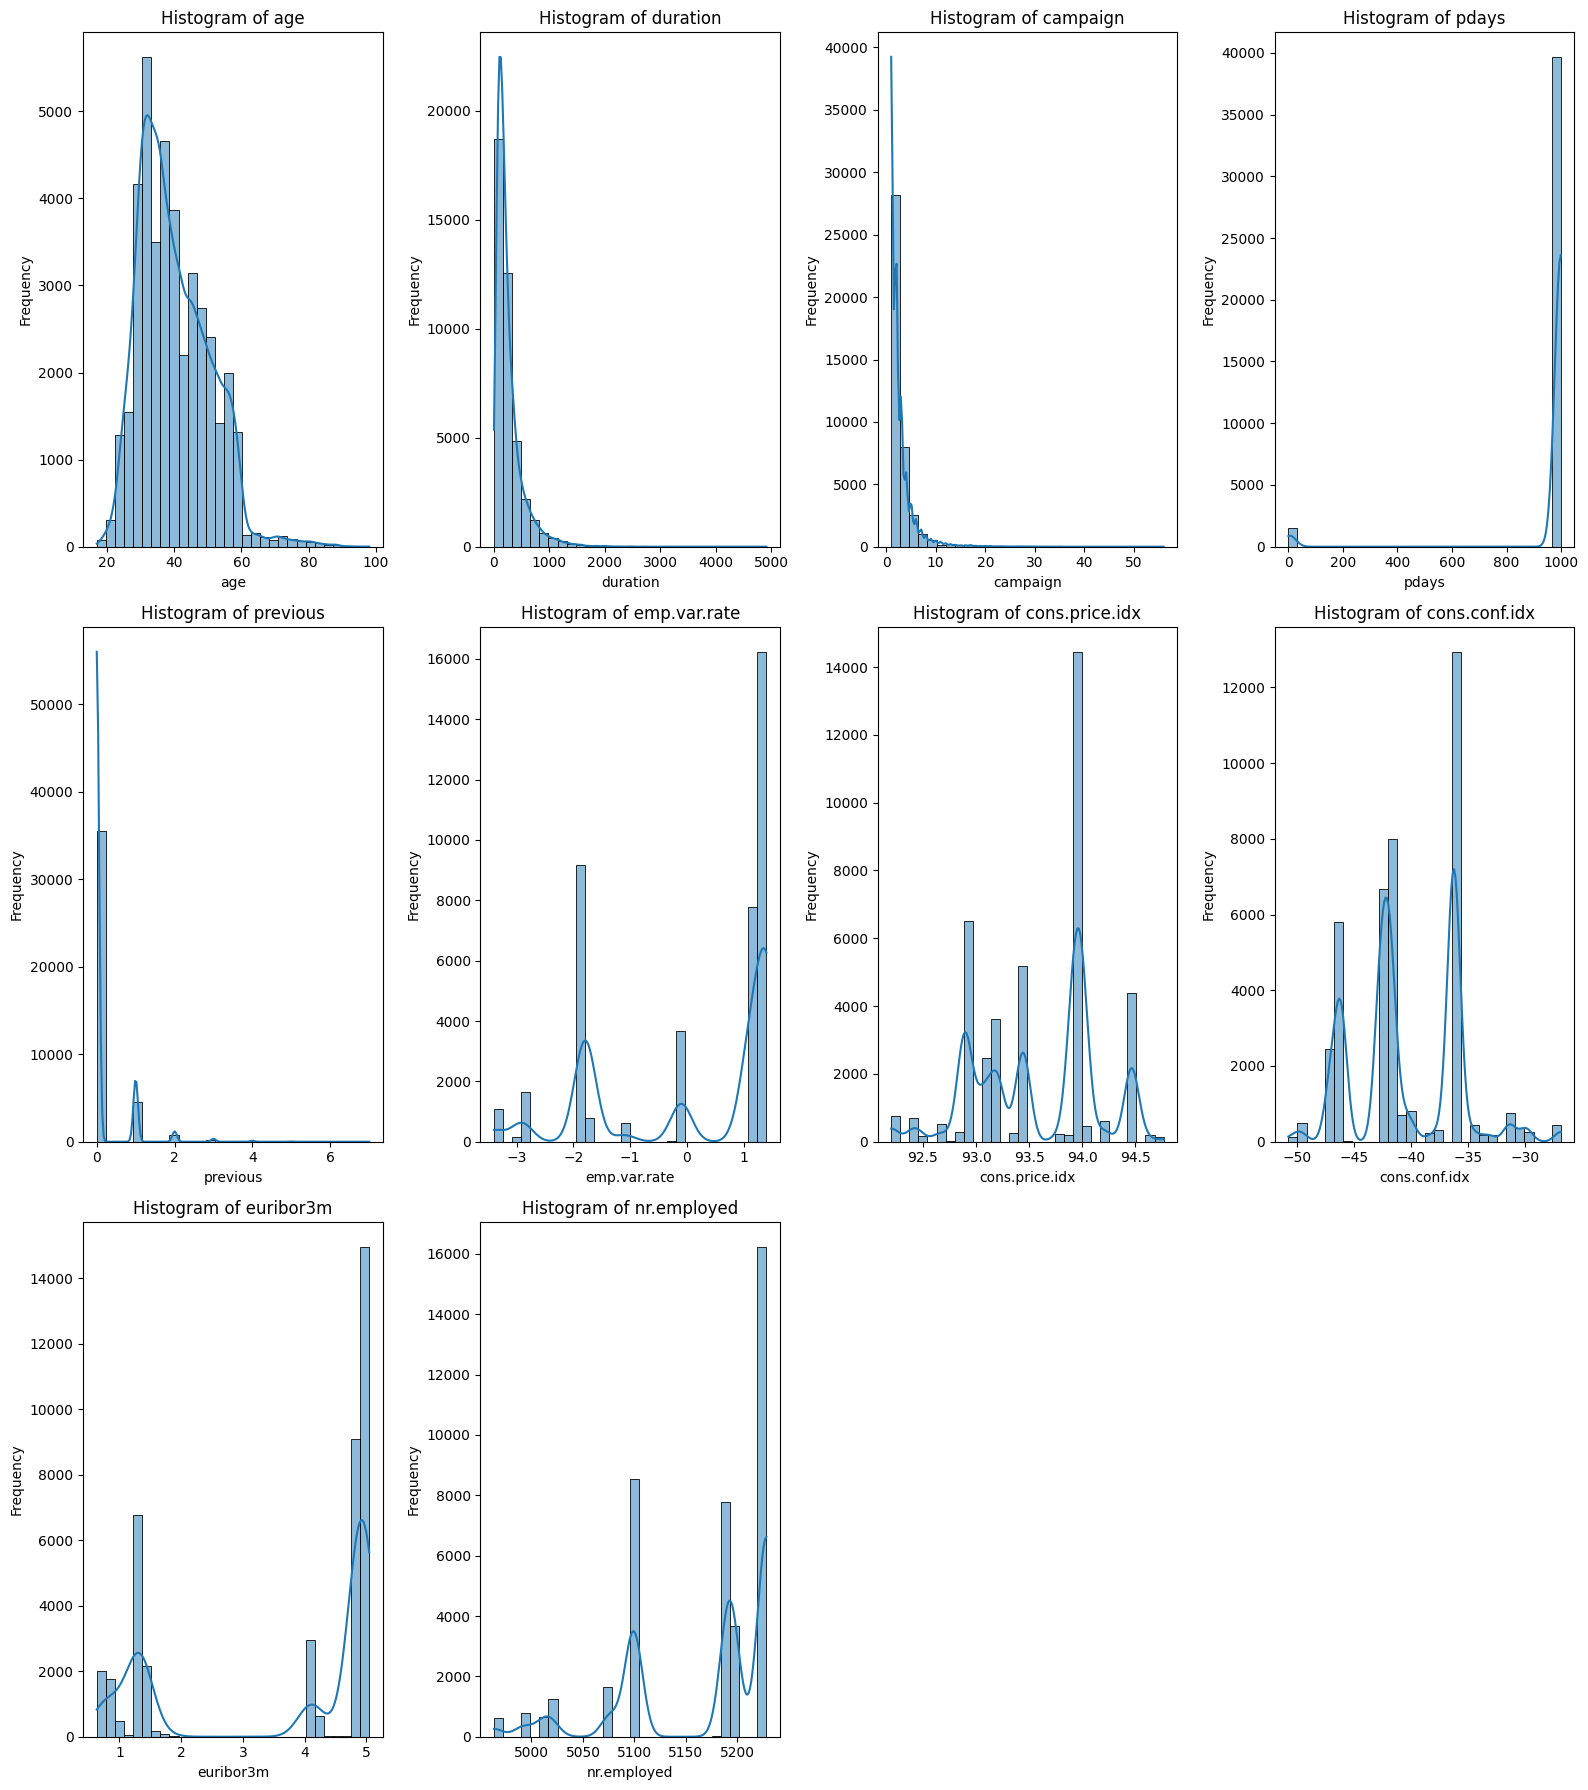

In [12]:
eda_univariate_numeric(df)

In [13]:
def eda_univariate_numeric_boxplot(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)

    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(16, 6 * num_rows))

    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.boxplot(y=df[col],palette='Set3')
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

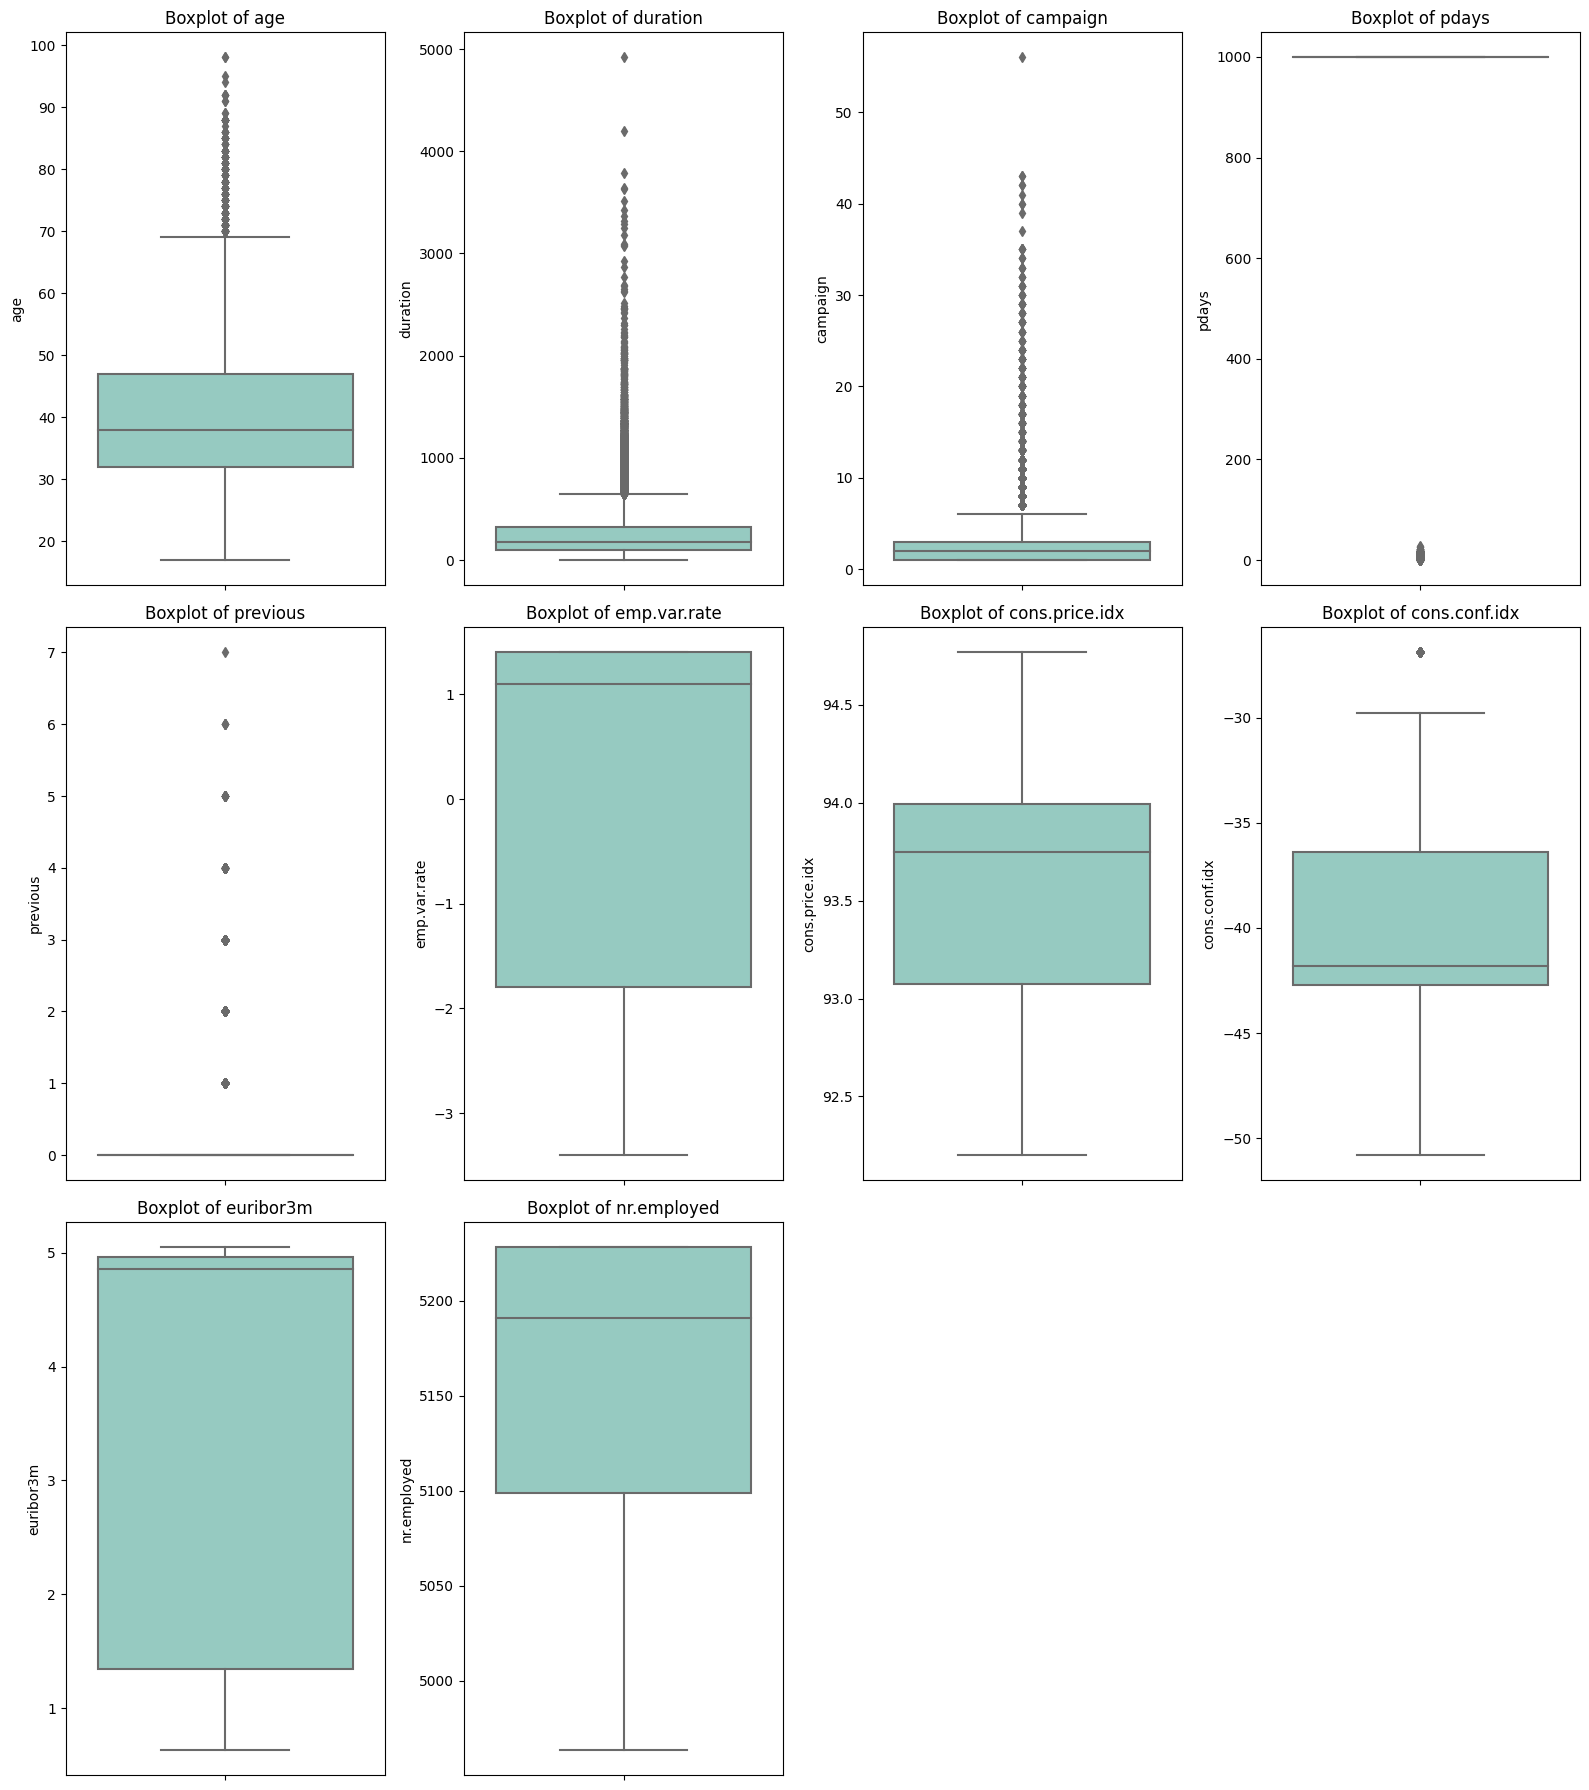

In [14]:

eda_univariate_numeric_boxplot(df)

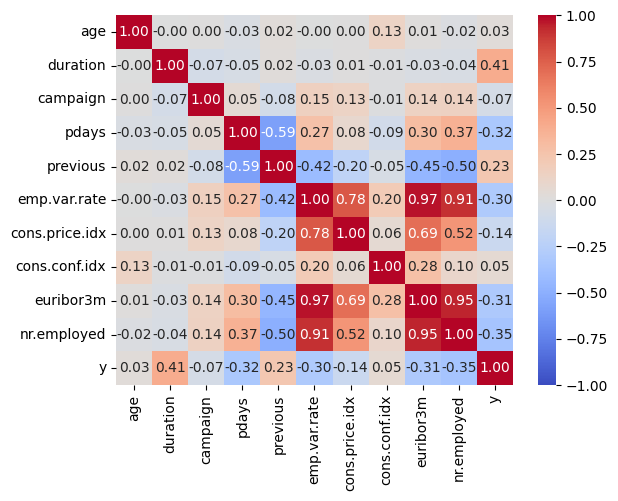

In [15]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="coolwarm", annot=True,fmt='.2f')
plt.show()

In [16]:
def plot_target_pie(df, target_col):
    target_counts = df[target_col].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(
        target_counts,
        labels=target_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Distribution of {target_col}')
    plt.axis('equal')
    plt.show()

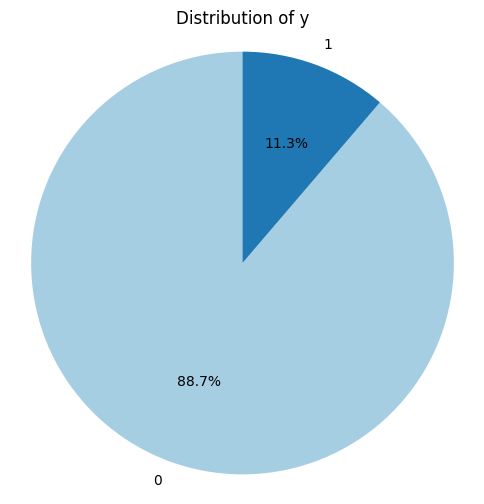

In [17]:
plot_target_pie(df, 'y')

In [18]:
def plot_all_categorical_histograms(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)

    cols_per_row = 3
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(6 * cols_per_row, 4 * num_rows))

    for idx, col in enumerate(categorical_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        order = df[col].value_counts().index
        ax = sns.countplot(data=df, x=col, order=order, palette='Set3')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()
     

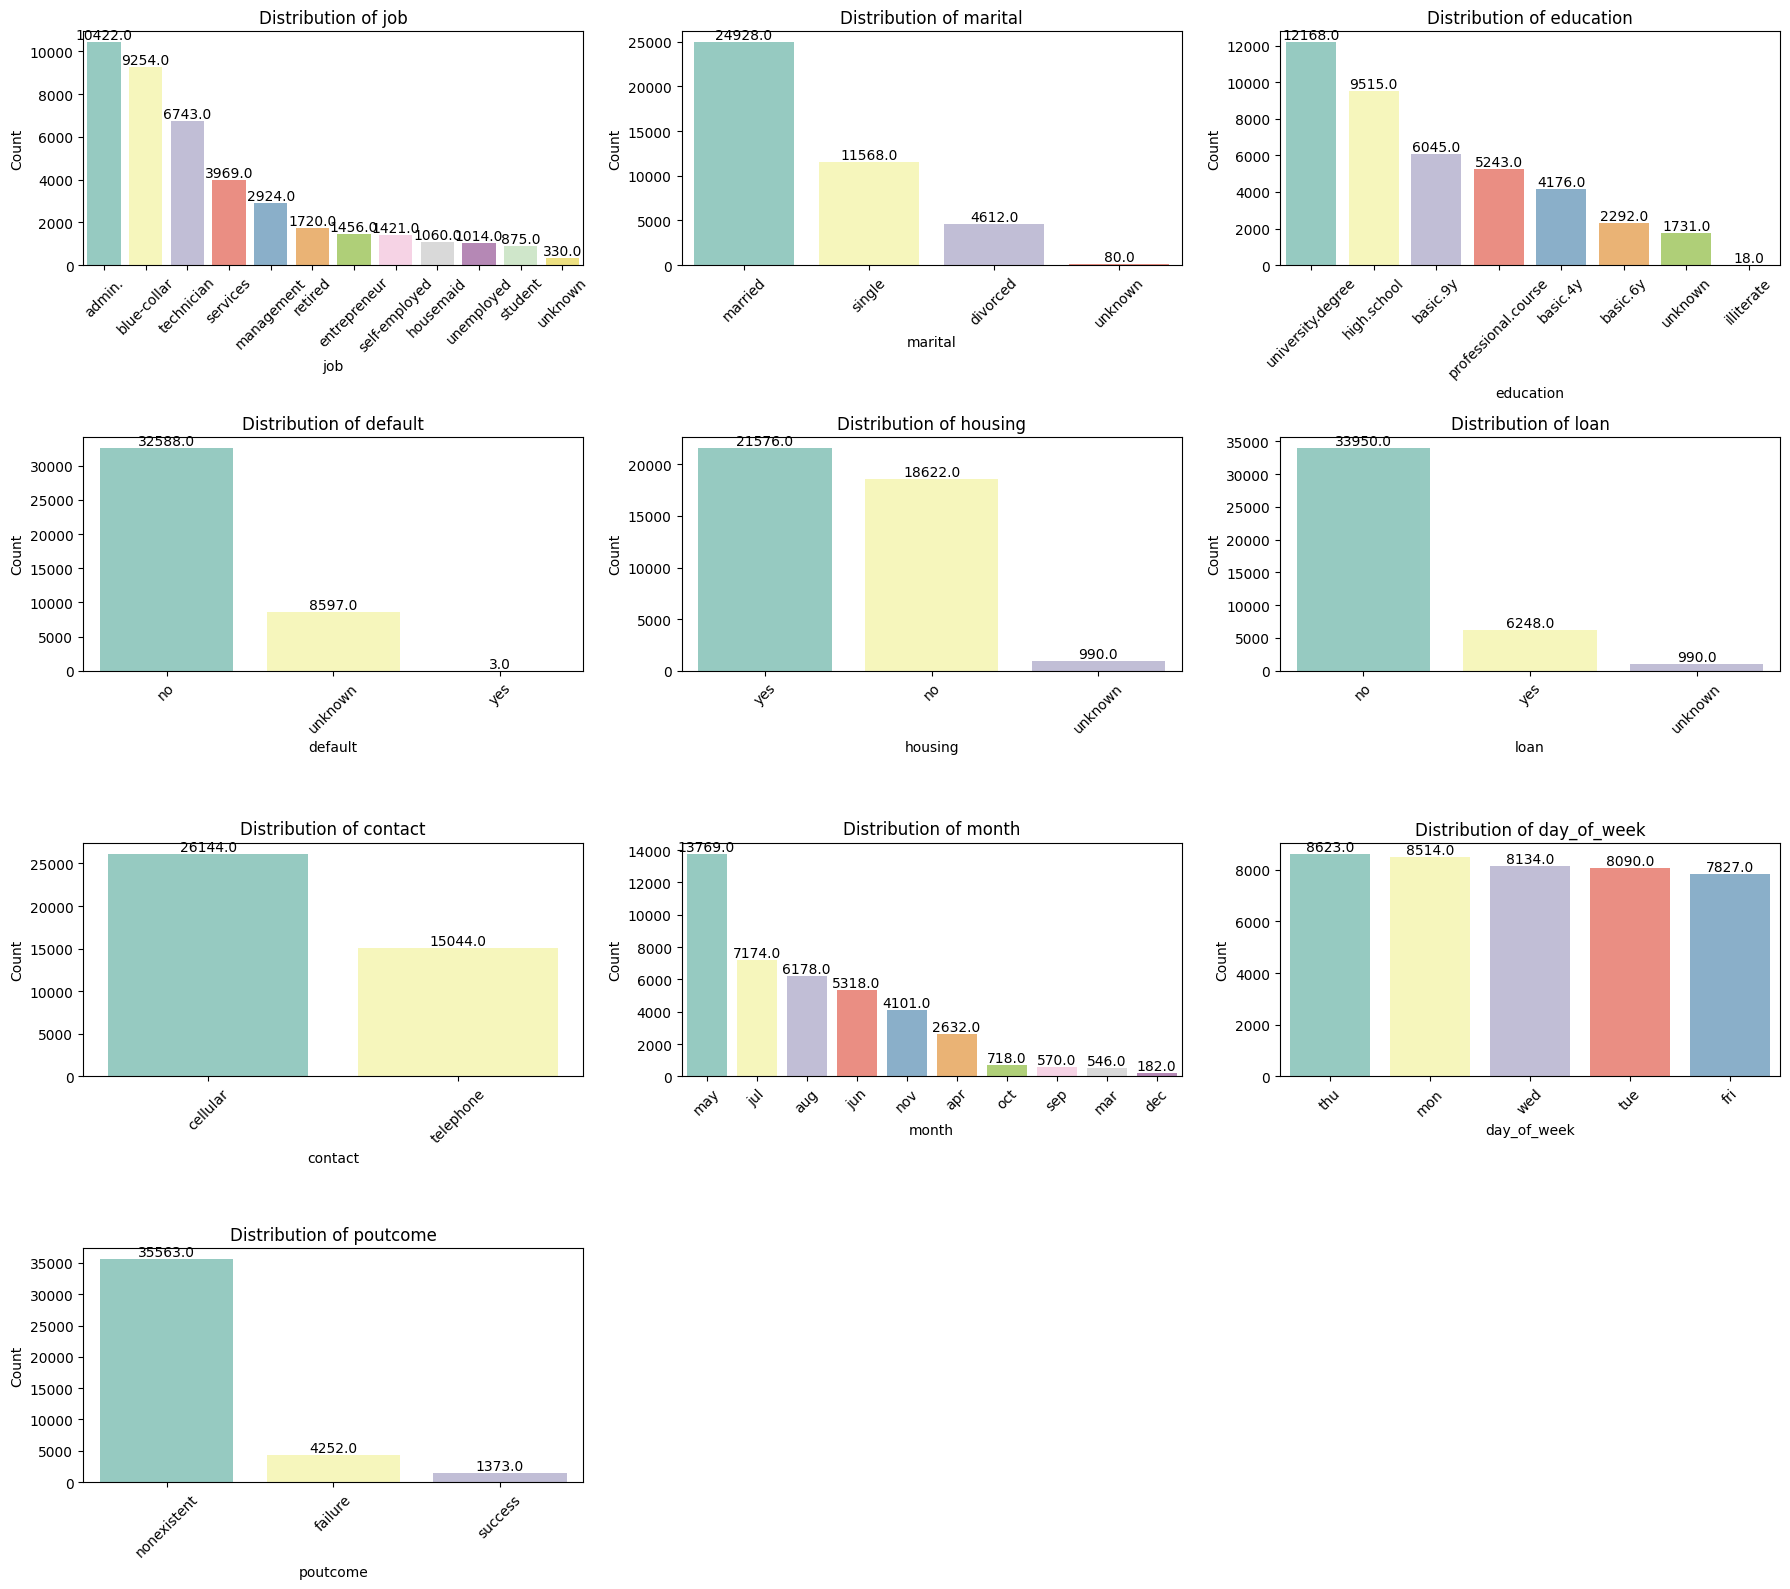

In [19]:
plot_all_categorical_histograms(df)
     

In [20]:
def plot_categorical_vs_target(df, target_col):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)

    cols_per_row = 3
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    plt.figure(figsize=(6 * cols_per_row, 5 * num_rows))

    for idx, col in enumerate(categorical_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)

        # Buat tabel proporsi (normalized)
        prop_df = (df.groupby(col)[target_col].value_counts(normalize=True).unstack().fillna(0))

        # Plot stacked bar chart
        ax = prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set3')
        plt.title(f'{col} vs {target_col} (Probability)')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)

        for container in ax.containers:
            for bar in container:
                height = bar.get_height()
                if height > 0.01:
                    ax.text(bar.get_x() + bar.get_width() / 2,bar.get_y() + height / 2,f'{height:.2f}', ha='center',va='center',fontsize=8,color='black')

    plt.tight_layout()
    plt.show()

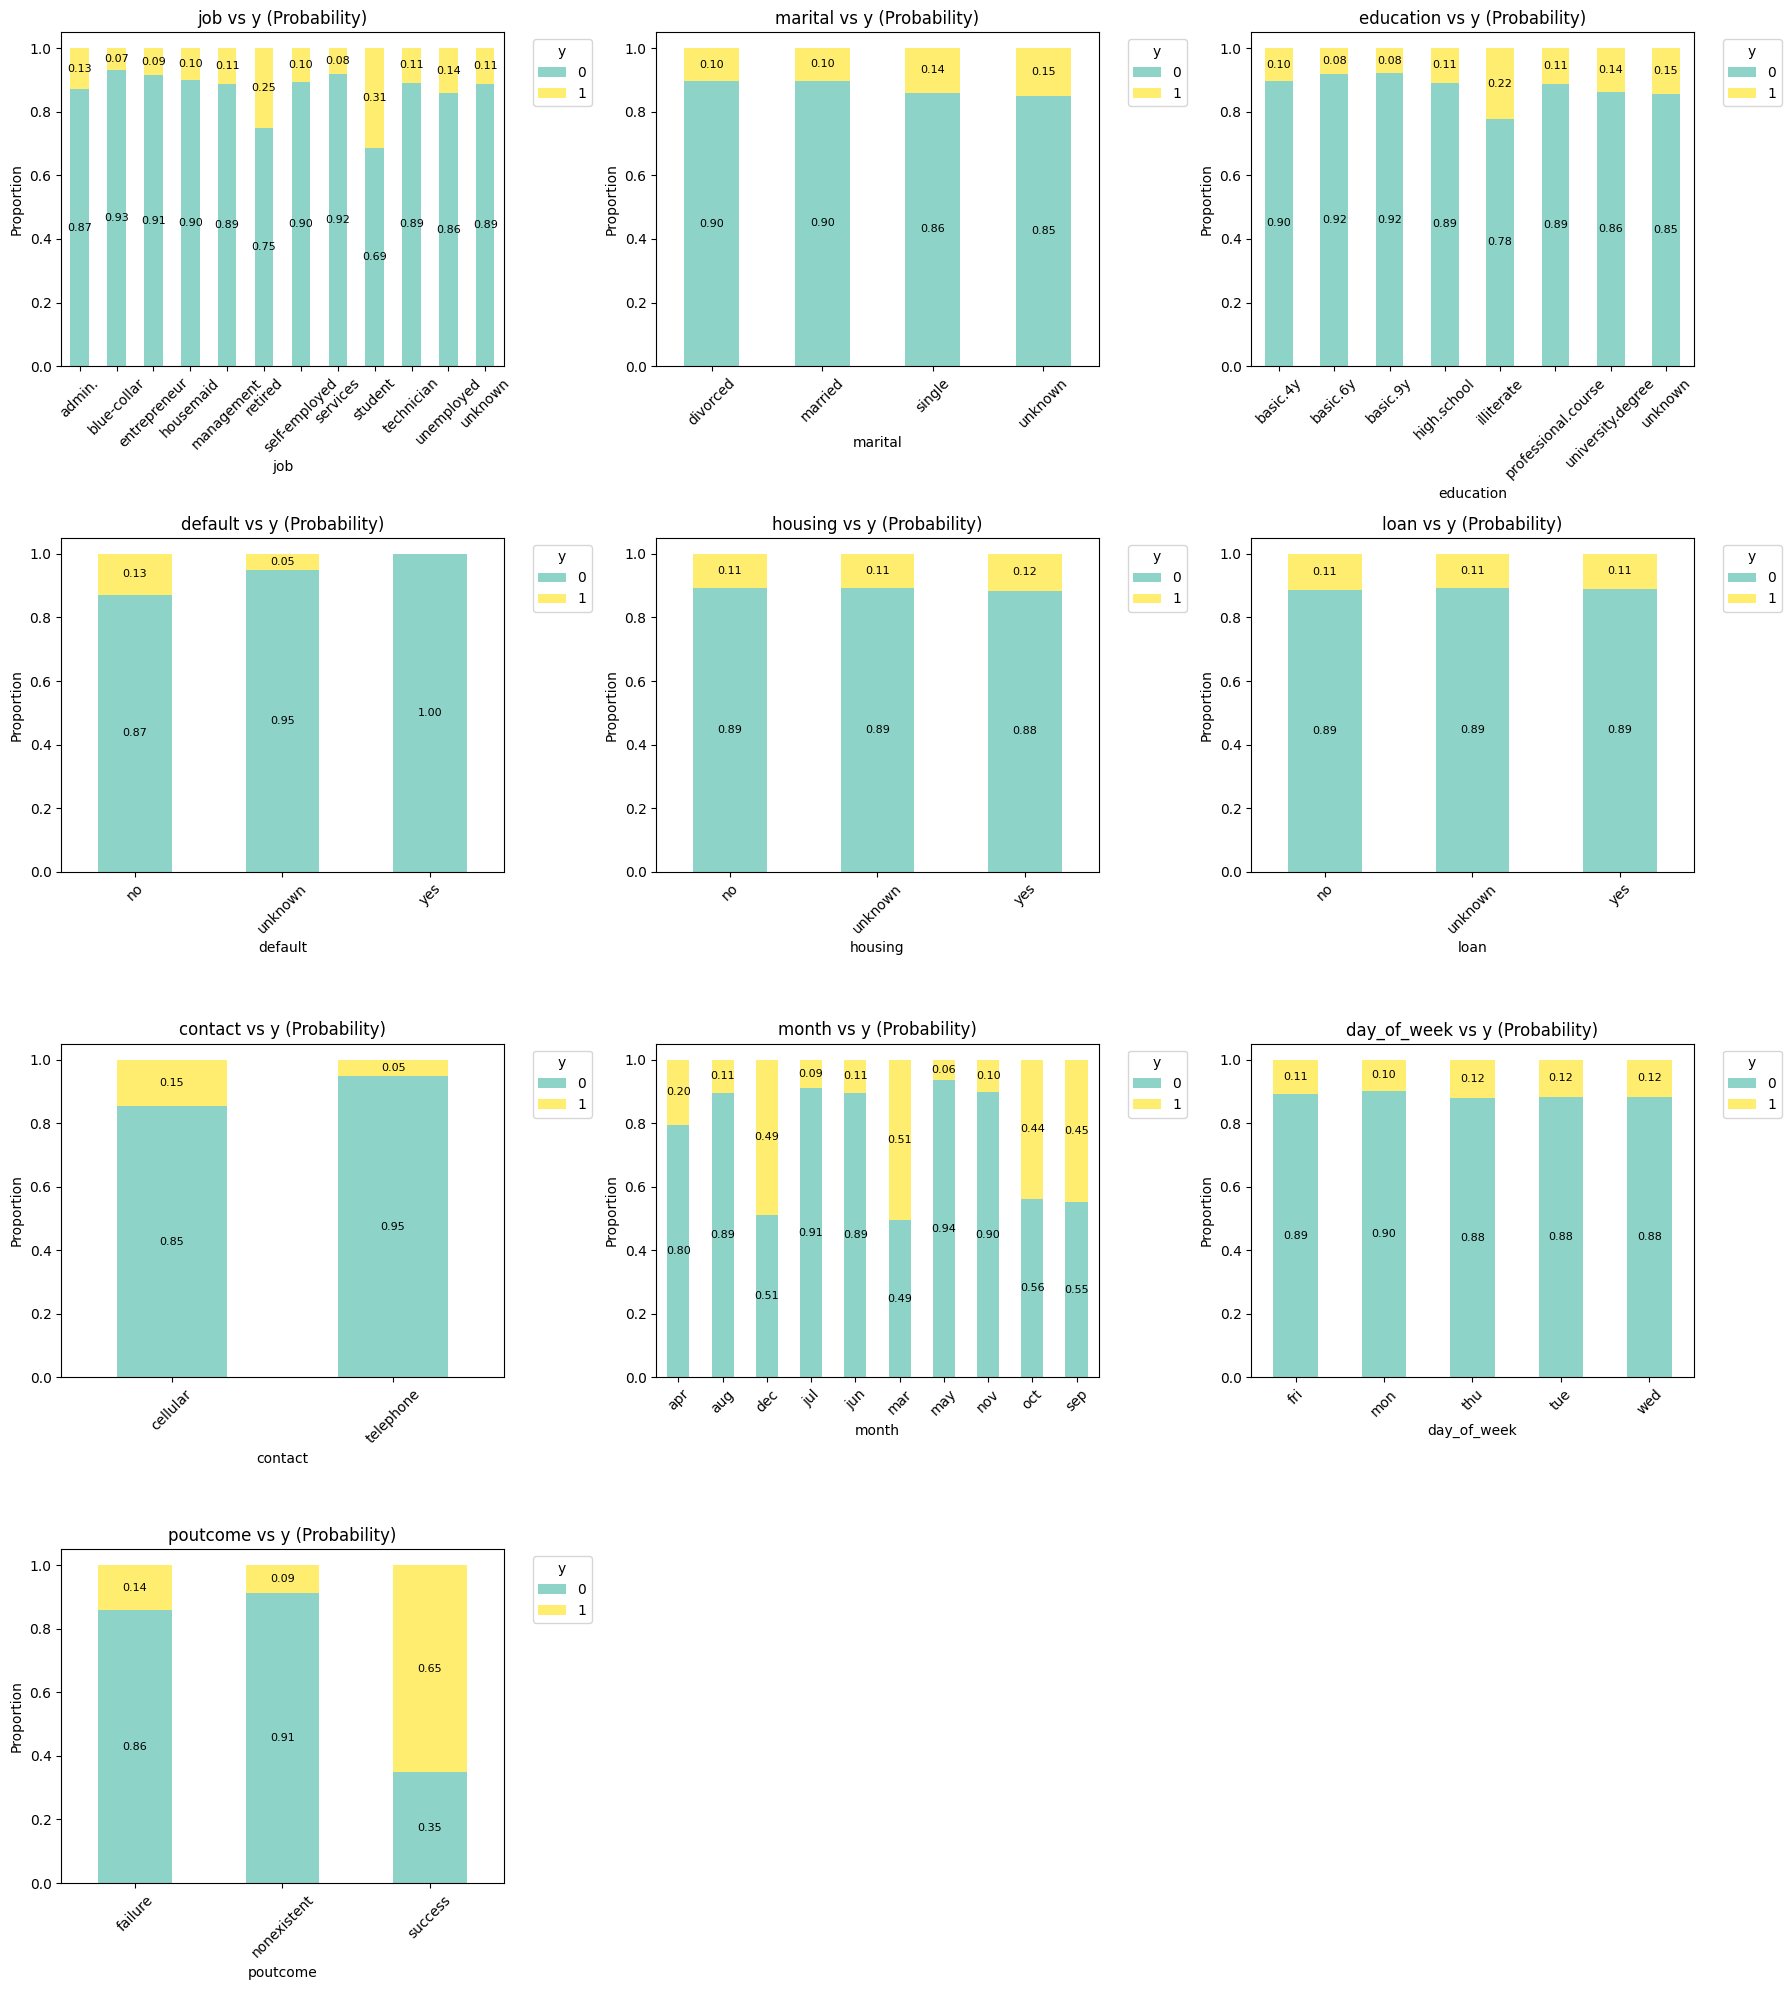

In [21]:
plot_categorical_vs_target(df, 'y')

In [22]:

cat_cols = df.select_dtypes(include=['object']).columns.tolist()
results = []

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    r_corr = r - (r-1)**2/(n-1)
    k_corr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1),(r_corr-1)))

for col in cat_cols:
    contingency = pd.crosstab(df[col], df['y'])

    chi2, p, dof, expected = chi2_contingency(contingency)

    cv = cramers_v(contingency)

    results.append([col, p, cv])

corr_df = pd.DataFrame(results, columns=['column', 'chi_square_pvalue', 'cramers_v'])
corr_df = corr_df.sort_values(by='cramers_v', ascending=False)

corr_df

,column,chi_square_pvalue,cramers_v
9,poutcome,0.000000e+00,0.320416
7,month,0.000000e+00,0.274000
0,job,4.189763e-199,0.151893
6,contact,1.525986e-189,0.144611
3,default,5.161958e-89,0.099111
2,education,3.305189e-38,0.067220
1,marital,2.068015e-26,0.053900
8,day_of_week,2.958482e-05,0.023188
4,housing,5.829448e-02,0.009458
5,loan,5.786753e-01,0.000000


## SMOTE

In [23]:
#Handling IMmbalanced data menggunakan SMOTE
def smote_manual(X, y, minority_class=1, k=5):
    X = np.array(X)
    y = np.array(y)

    X_min = X[y == minority_class]
    X_maj = X[y != minority_class]

    n_min = len(X_min)
    n_maj = len(X_maj)

    n_synthetic = n_maj - n_min
    if n_synthetic <= 0:
        print("Class sudah balance.")
        return X, y

    nn = NearestNeighbors(n_neighbors=k).fit(X_min)
    neighbors = nn.kneighbors(X_min, return_distance=False)

    synthetic_samples = []

    for _ in range(n_synthetic):
        sample_idx = np.random.randint(0, n_min)
        neighbor_idx = np.random.choice(neighbors[sample_idx])
        
        p1 = X_min[sample_idx]
        p2 = X_min[neighbor_idx]

        gap = np.random.rand()
        synthetic = p1 + gap * (p2 - p1)

        synthetic_samples.append(synthetic)

    X_syn = np.array(synthetic_samples)
    y_syn = np.full(len(X_syn), minority_class)

    return np.vstack([X, X_syn]), np.concatenate([y, y_syn])
    

## Split for Pipeline

In [24]:
# Handle Outlier, Duplikat, pdays, NA -> akan digunakan fungsinya untuk Pipeline
def handle_column(df):
    df_2 = df.copy()

    # Hapus usia > 70
    df_2 = df_2[df_2["age"] < 70]

    # Hapus duplikat
    df_2 = df_2.drop_duplicates().reset_index(drop=True)

    # Fitur pdays
    df_2["pdays_was_contacted"] = (df_2["pdays"] != 999).astype(int)

    # Replace 999 -> NA lalu isi median
    df_2["pdays_clean"] = df_2["pdays"].replace(999, np.nan)
    median = df_2["pdays_clean"].median()
    df_2["pdays_clean"] = df_2["pdays_clean"].fillna(median)

    return df_2
    
# Split Raw for Pipeline
from sklearn.model_selection import train_test_split

df_raw = handle_column(df)

X_raw = df_raw.drop('y', axis=1)
y_raw = df_raw['y']
final_columns = X_raw.columns.tolist()
final_columns
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42,stratify=y_raw)

## Preprocessing Pipeline

In [25]:

# Feature selection
def feature_selection(df):
    return df.drop(['duration', 'loan', 'housing'], axis=1)

feature_selection_tf = FunctionTransformer(feature_selection)


# Frequency Encoding
def frequency_encode(df):
    df_2 = df.copy()
    for col in ["job", "month"]:
        freq = df_2[col].value_counts(normalize=True)
        df_2[col] = df_2[col].map(freq)
    return df_2

frequency_encoder_tf = FunctionTransformer(frequency_encode)


# Label Encoding
def label_encode(df):
    df_2 = df.copy()
    label_cols = ['marital', 'default', 'contact', 'poutcome']
    for col in label_cols:
        df_2[col] = df_2[col].astype("category").cat.codes
    return df_2

label_encoder_tf = FunctionTransformer(label_encode)


# Column Transformer
column_encoder = ColumnTransformer(
    transformers=[
        ("edu_or", OrdinalEncoder(), ["education"]),
        ("day_ohe", OneHotEncoder(handle_unknown="ignore"), ["day_of_week"])
    ],
    remainder="passthrough"
)


# Pipeline tanpa smote
pipeline = Pipeline([
    ("feature_selection", feature_selection_tf),
    ("freq_encode", frequency_encoder_tf),
    ("label_encode", label_encoder_tf),
    ("col_encode", column_encoder),
    ("scaler", StandardScaler())
])

# BaseLine Model

In [26]:


X_train_final = pipeline.fit_transform(X_train_raw)
X_test_final = pipeline.transform(X_test_raw)
y_train_final = y_train_raw
y_test_final = y_test_raw

X_train_smote, y_train_smote = smote_manual(X_train_final, y_train_final)

baseline_model = LogisticRegression(random_state=42, max_iter=500)
baseline_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=500, random_state=42)

In [27]:
y_pred = baseline_model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test_final, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred))
print("Classification Report:\n", classification_report(y_test_final, y_pred))

Accuracy: 0.8136412019978712
Confusion Matrix:
 [[9114 1774]
 [ 502  823]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89     10888
           1       0.32      0.62      0.42      1325

    accuracy                           0.81     12213
   macro avg       0.63      0.73      0.65     12213
weighted avg       0.88      0.81      0.84     12213



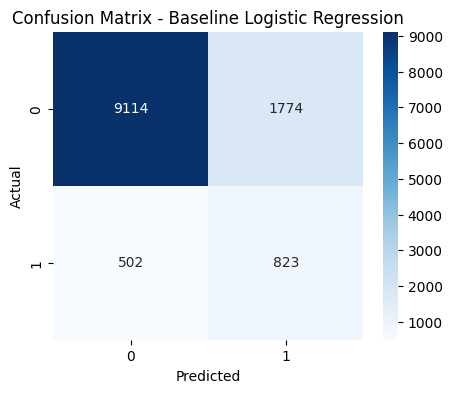

In [28]:
cm = confusion_matrix(y_test_final, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
#Cek Overfitting
y_pred_train = baseline_model.predict(X_train_final)

metrics = {
    'Metric': ['Accuracy', 'Recall'],
    'Training Set': [
        accuracy_score(y_train_final, y_pred_train),
        recall_score(y_train_final, y_pred_train)
    ],
    'Test Set': [
        accuracy_score(y_test_final, y_pred),
        recall_score(y_test_final, y_pred)
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df['Difference (Train-Test)'] = metrics_df['Training Set'] - metrics_df['Test Set']

metrics_df[['Training Set', 'Test Set', 'Difference (Train-Test)']] = \
    metrics_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(
        lambda x: f"{x:.2%}"
    )

print("\nPerformance Metrics:")
display(metrics_df)


Performance Metrics:


/tmp/ipykernel_47/605925535.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(


,Metric,Training Set,Test Set,Difference (Train-Test)
0,Accuracy,81.51%,81.36%,0.14%
1,Recall,62.46%,62.11%,0.35%


# Eksplorasi Model

## Random Forest

Accuracy :  0.8254319168099566
Recall :  0.6437735849056604
Confusion Matrix:
 [[9114 1774]
 [ 502  823]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89     10888
           1       0.32      0.62      0.42      1325

    accuracy                           0.81     12213
   macro avg       0.63      0.73      0.65     12213
weighted avg       0.88      0.81      0.84     12213



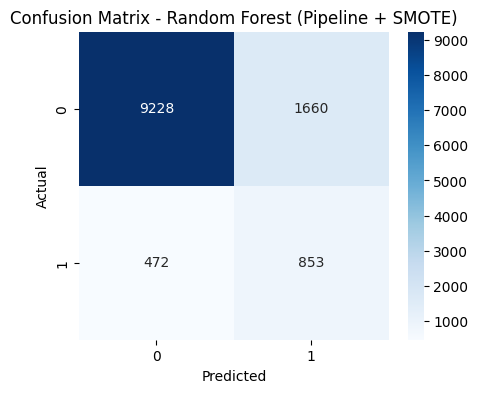

In [30]:
X_train_smote_rf, y_train_smote_rf = smote_manual(X_train_final, y_train_final)

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features="sqrt",
    bootstrap=True,
    class_weight="balanced",  # karena imbalanced
    random_state=42
)

rf.fit(X_train_smote_rf, y_train_smote_rf)

y_pred_train_rf = rf.predict(X_train_smote_rf)
y_pred_test_rf = rf.predict(X_test_final)

# Evaluasi
test_acc = accuracy_score(y_test_final, y_pred_test_rf)
test_recall = recall_score(y_test_final, y_pred_test_rf)

print("Accuracy : ", test_acc)
print("Recall : ", test_recall)
print("Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred))
print("Classification Report:\n", classification_report(y_test_final, y_pred))

cm = confusion_matrix(y_test_final, y_pred_test_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Pipeline + SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [31]:
#cek overfitting
metrics_rf = {
    'Metric': ['Accuracy', 'Recall'],
    'Training Set': [
        accuracy_score(y_train_smote_rf, y_pred_train_rf),
        recall_score(y_train_smote_rf, y_pred_train_rf)
    ],
    'Test Set': [
        accuracy_score(y_test_final, y_pred_test_rf),
        recall_score(y_test_final, y_pred_test_rf)
    ]
}

metrics_rf_df = pd.DataFrame(metrics_rf)
metrics_rf_df['Difference (Train-Test)'] = metrics_rf_df['Training Set'] - metrics_rf_df['Test Set']

metrics_rf_df[['Training Set', 'Test Set', 'Difference (Train-Test)']] = \
    metrics_rf_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(
        lambda x: f"{x:.2%}"
    )

print("\nPerformance Metrics (Random Forest):")
display(metrics_rf_df)



Performance Metrics (Random Forest):


/tmp/ipykernel_47/3109147687.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_rf_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(


,Metric,Training Set,Test Set,Difference (Train-Test)
0,Accuracy,81.67%,82.54%,-0.88%
1,Recall,72.76%,64.38%,8.38%


In [32]:
#model-model yang mau dibuat ditaro disini

# Model With HyperParameter (Optuna)

## XGBoost with Class Weight

In [33]:


# Copy Raw Data
X_train_xgb = X_train_raw
X_test_xgb =  X_test_raw

# Class Weight
k1 = (y_train_raw == 1).sum()
k2 = (y_train_raw == 0).sum()
scale = k2/k1
print("scale_class_weight = ", scale)

# XGBoost Classifier
def objective_xgb(trial):
    model = XGBClassifier(
        n_estimators=trial.suggest_int('n_estimators', 100, 300),
        max_depth=trial.suggest_int('max_depth', 3, 10),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        subsample=trial.suggest_float('subsample', 0.6, 1.0),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        scale_pos_weight=scale 
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X_train_xgb, y_train_raw):
        #split
        X_tr = X_train_xgb.iloc[train_idx].reset_index(drop=True)
        y_tr = y_train_raw.iloc[train_idx].reset_index(drop=True)
        X_val = X_train_xgb.iloc[val_idx]
        y_val = y_train_raw.iloc[val_idx]

        #pipeline
        X_tr = pipeline.fit_transform(X_tr)
        X_val = pipeline.transform(X_val)

        #SMOTE Method
        # y_tr = np.array(y_tr)
        # X_tr_sm, y_tr_sm = smote_manual(X_tr, y_tr)

        #train
        model.fit(X_tr, y_tr) # Class Weight Method

        #evaluate
        y_pred = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val, y_pred))
    return np.mean(scores)

# Hyperparameter Tuning
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=30)
best_xgb = XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale) # Class Weight Method

[I 2025-12-01 16:59:07,228] A new study created in memory with name: no-name-13cc4019-59d6-4c81-ab81-8943ee872317


scale_class_weight =  8.212738441642419


[I 2025-12-01 16:59:08,044] Trial 0 finished with value: 0.7893735963557357 and parameters: {'n_estimators': 202, 'max_depth': 3, 'learning_rate': 0.051332544491573456, 'subsample': 0.9070449354468406, 'colsample_bytree': 0.6235785183682211}. Best is trial 0 with value: 0.7893735963557357.
[I 2025-12-01 16:59:08,868] Trial 1 finished with value: 0.7849460476225071 and parameters: {'n_estimators': 245, 'max_depth': 3, 'learning_rate': 0.010320069997005975, 'subsample': 0.821257110378439, 'colsample_bytree': 0.9730985367559283}. Best is trial 0 with value: 0.7893735963557357.
[I 2025-12-01 16:59:09,604] Trial 2 finished with value: 0.7625666236880365 and parameters: {'n_estimators': 139, 'max_depth': 5, 'learning_rate': 0.2248063698228031, 'subsample': 0.8394712380894811, 'colsample_bytree': 0.7901652353685454}. Best is trial 0 with value: 0.7893735963557357.
[I 2025-12-01 16:59:10,365] Trial 3 finished with value: 0.7409097358715074 and parameters: {'n_estimators': 123, 'max_depth': 6, 

In [34]:

# MAIN
X_train_xgb = pipeline.fit_transform(X_train_raw)
X_test_xgb = pipeline.transform(X_test_raw)

# Smote
# y_train_xgb = np.array(y_train_raw)
# X_train_xgb, y_train_xgb = smote_manual(X_train_xgb, y_train_xgb)

#Class Weight Method
y_train_xgb = y_train_raw

# FIT
best_xgb.fit(X_train_xgb, y_train_xgb)

# PREDICT
y_pred_train_xgb = best_xgb.predict(X_train_xgb)
y_pred_test_xgb = best_xgb.predict(X_test_xgb)
y_proba_test_xgb = best_xgb.predict_proba(X_test_xgb)[:, 1]

# EVALUASI
test_acc = accuracy_score(y_test_raw, y_pred_test_xgb)
test_recall = recall_score(y_test_raw, y_pred_test_xgb)

print("Test Accuracy     :", test_acc)
print("Test Recall       :", test_recall)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_raw, y_pred_test_xgb))
print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred_test_xgb))

Test Accuracy     : 0.8308359944321625
Test Recall       : 0.6513207547169811

Confusion Matrix:
[[9284 1604]
 [ 462  863]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     10888
           1       0.35      0.65      0.46      1325

    accuracy                           0.83     12213
   macro avg       0.65      0.75      0.68     12213
weighted avg       0.89      0.83      0.85     12213



In [35]:
#cek overfitting
metrics_xgb = {
    'Metric': ['Accuracy', 'Recall'],
    'Training Set': [
        accuracy_score(y_train_xgb, y_pred_train_xgb),
        recall_score(y_train_xgb, y_pred_train_xgb)
    ],
    'Test Set': [
        accuracy_score(y_test_raw,y_pred_test_xgb),
        recall_score(y_test_raw,y_pred_test_xgb)
    ]
}

metrics_xgb_df = pd.DataFrame(metrics_xgb)

# Selisih Train - Test
metrics_xgb_df['Difference (Train-Test)'] = \
    metrics_xgb_df['Training Set'] - metrics_xgb_df['Test Set']

# Format persen
metrics_xgb_df[['Training Set', 'Test Set', 'Difference (Train-Test)']] = \
    metrics_xgb_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(
        lambda x: f"{x:.2%}" if isinstance(x, (int, float)) else x
    )

# ---- TAMPILKAN ----
print("\nPerformance Metrics (XGBoost):")
display(metrics_xgb_df)


Performance Metrics (XGBoost):


/tmp/ipykernel_47/1422644861.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_xgb_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(


,Metric,Training Set,Test Set,Difference (Train-Test)
0,Accuracy,85.03%,83.08%,1.94%
1,Recall,62.11%,65.13%,-3.02%


## KNN with SMOTE

In [36]:


# Copy Raw Data
X_train_knn = X_train_raw
X_test_knn =  X_test_raw

# KNN Classifier
def objective_knn(trial):
    model = KNeighborsClassifier(
        n_neighbors=trial.suggest_int('n_neighbors', 1, 30),
        metric='minkowski',
        p=2,
        weights='distance',
        algorithm='auto',
        n_jobs=-1
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X_train_knn, y_train_raw):
        #split
        X_tr = X_train_knn.iloc[train_idx].reset_index(drop=True)
        y_tr = y_train_raw.iloc[train_idx].reset_index(drop=True)
        X_val = X_train_knn.iloc[val_idx]
        y_val = y_train_raw.iloc[val_idx]

        #pipeline
        X_tr = pipeline.fit_transform(X_tr)
        X_val = pipeline.transform(X_val)

        #SMOTE Method
        y_tr = np.array(y_tr)
        X_tr_sm, y_tr_sm = smote_manual(X_tr, y_tr)

        #train
        model.fit(X_tr_sm, y_tr_sm) # SMOTE Method

        #evaluate
        y_pred = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val, y_pred))
    return np.mean(scores)

# Hyperparameter Tuning
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=30)
best_knn = KNeighborsClassifier(**study_knn.best_params)

[I 2025-12-01 16:59:36,763] A new study created in memory with name: no-name-5b5460d7-3345-4a10-a3c6-60d9e23e493d
[I 2025-12-01 16:59:39,567] Trial 0 finished with value: 0.6713298483083494 and parameters: {'n_neighbors': 2}. Best is trial 0 with value: 0.6713298483083494.
[I 2025-12-01 16:59:42,392] Trial 1 finished with value: 0.6311236066021902 and parameters: {'n_neighbors': 1}. Best is trial 0 with value: 0.6713298483083494.
[I 2025-12-01 16:59:45,330] Trial 2 finished with value: 0.7367424175355496 and parameters: {'n_neighbors': 19}. Best is trial 2 with value: 0.7367424175355496.
[I 2025-12-01 16:59:48,224] Trial 3 finished with value: 0.7340400323090832 and parameters: {'n_neighbors': 18}. Best is trial 2 with value: 0.7367424175355496.
[I 2025-12-01 16:59:51,213] Trial 4 finished with value: 0.7432296567322805 and parameters: {'n_neighbors': 27}. Best is trial 4 with value: 0.7432296567322805.
[I 2025-12-01 16:59:54,113] Trial 5 finished with value: 0.7363655456715628 and par

In [37]:


# MAIN
X_train_knn = pipeline.fit_transform(X_train_raw)
X_test_knn = pipeline.transform(X_test_raw)

# Smote
y_train_knn = np.array(y_train_raw)
X_train_knn, y_train_knn = smote_manual(X_train_knn, y_train_knn)

# FIT
best_knn.fit(X_train_knn, y_train_knn)

# PREDICT
y_pred_train_knn = best_knn.predict(X_train_knn)
y_pred_test_knn = best_knn.predict(X_test_knn)
y_proba_test_knn = best_knn.predict_proba(X_test_knn)[:, 1]

# EVALUASI
test_acc = accuracy_score(y_test_raw, y_pred_test_knn)
test_recall = recall_score(y_test_raw, y_pred_test_knn)

print("Test Accuracy     :", test_acc)
print("Test Recall       :", test_recall)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_raw, y_pred_test_knn))
print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred_test_knn))

Test Accuracy     : 0.7432244329812495
Test Recall       : 0.6671698113207547

Confusion Matrix:
[[8193 2695]
 [ 441  884]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10888
           1       0.25      0.67      0.36      1325

    accuracy                           0.74     12213
   macro avg       0.60      0.71      0.60     12213
weighted avg       0.87      0.74      0.79     12213



In [38]:
#cek overfitting
metrics_knn = {
    'Metric': ['Accuracy', 'Recall'],
    'Training Set': [
        accuracy_score(y_train_knn, y_pred_train_knn),
        recall_score(y_train_knn, y_pred_train_knn)
    ],
    'Test Set': [
        accuracy_score(y_test_raw,y_pred_test_knn),
        recall_score(y_test_raw,y_pred_test_knn)
    ]
}

metrics_knn_df = pd.DataFrame(metrics_knn)

# Selisih Train - Test
metrics_knn_df['Difference (Train-Test)'] = \
    metrics_knn_df['Training Set'] - metrics_knn_df['Test Set']

# Format persen
metrics_knn_df[['Training Set', 'Test Set', 'Difference (Train-Test)']] = \
    metrics_knn_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(
        lambda x: f"{x:.2%}" if isinstance(x, (int, float)) else x
    )

# ---- TAMPILKAN ----
print("\nPerformance Metrics (KNN):")
display(metrics_knn_df)


Performance Metrics (KNN):


/tmp/ipykernel_47/3877353244.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_knn_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(


,Metric,Training Set,Test Set,Difference (Train-Test)
0,Accuracy,80.53%,74.32%,6.20%
1,Recall,84.28%,66.72%,17.57%


## Decision Tree with Class Weight

In [39]:

# Copy Raw Data
X_train_dt = X_train_raw
X_test_dt =  X_test_raw

# Decision Tree Classifier
def objective_dt(trial):
    model = DecisionTreeClassifier(
        random_state=42,
        max_depth=trial.suggest_int('max_depth', 3, 15),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 4),
        class_weight = 'balanced'
    )

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X_train_dt, y_train_raw):
        #split
        X_tr = X_train_dt.iloc[train_idx].reset_index(drop=True)
        y_tr = y_train_raw.iloc[train_idx].reset_index(drop=True)
        X_val = X_train_dt.iloc[val_idx]
        y_val = y_train_raw.iloc[val_idx]

        #pipeline
        X_tr = pipeline.fit_transform(X_tr)
        X_val = pipeline.transform(X_val)

        #SMOTE Method
        # y_tr = np.array(y_tr)
        # X_tr_sm, y_tr_sm = smote_manual(X_tr, y_tr)

        #train
        model.fit(X_tr, y_tr) # Class Weight Method

        #evaluate
        y_pred = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val, y_pred))
    return np.mean(scores)

# Hyperparameter Tuning
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=30)
best_dt = DecisionTreeClassifier(**study_dt.best_params, class_weight = 'balanced')

[I 2025-12-01 17:01:14,034] A new study created in memory with name: no-name-461336c0-fc5f-41be-8fdf-e42d75869aed
[I 2025-12-01 17:01:14,324] Trial 0 finished with value: 0.771663215842349 and parameters: {'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.771663215842349.
[I 2025-12-01 17:01:14,714] Trial 1 finished with value: 0.6786536738916665 and parameters: {'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.771663215842349.
[I 2025-12-01 17:01:15,050] Trial 2 finished with value: 0.7388492824154568 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.771663215842349.
[I 2025-12-01 17:01:15,309] Trial 3 finished with value: 0.7644601220853117 and parameters: {'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.771663215842349.
[I 2025-12-01 17:01:15,632] Trial 4 finished with value: 0.74773004043

In [40]:

# MAIN
X_train_dt = pipeline.fit_transform(X_train_raw)
X_test_dt = pipeline.transform(X_test_raw)

# Smote
# y_train_dt = np.array(y_train_raw)
# X_train_dt, y_train_dt = smote_manual(X_train_dt, y_train_dt)

#Class Weight Method
y_train_dt = y_train_raw

# FIT
best_dt.fit(X_train_dt, y_train_dt)

# PREDICT
y_pred_train_dt = best_dt.predict(X_train_dt)
y_pred_test_dt = best_dt.predict(X_test_dt)
y_proba_test_dt = best_dt.predict_proba(X_test_dt)[:, 1]

# EVALUASI
test_acc = accuracy_score(y_test_raw, y_pred_test_dt)
test_recall = recall_score(y_test_raw, y_pred_test_dt)

print("Test Accuracy     :", test_acc)
print("Test Recall       :", test_recall)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_raw, y_pred_test_dt))
print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred_test_dt))

Test Accuracy     : 0.8456562679112422
Test Recall       : 0.5932075471698113

Confusion Matrix:
[[9542 1346]
 [ 539  786]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10888
           1       0.37      0.59      0.45      1325

    accuracy                           0.85     12213
   macro avg       0.66      0.73      0.68     12213
weighted avg       0.88      0.85      0.86     12213



In [41]:
#cek overfitting
metrics_dt = {
    'Metric': ['Accuracy', 'Recall'],
    'Training Set': [
        accuracy_score(y_train_dt, y_pred_train_dt),
        recall_score(y_train_dt, y_pred_train_dt)
    ],
    'Test Set': [
        accuracy_score(y_test_raw,y_pred_test_dt),
        recall_score(y_test_raw,y_pred_test_dt)
    ]
}

metrics_dt_df = pd.DataFrame(metrics_dt)

# Selisih Train - Test
metrics_dt_df['Difference (Train-Test)'] = \
    metrics_dt_df['Training Set'] - metrics_dt_df['Test Set']

# Format persen
metrics_dt_df[['Training Set', 'Test Set', 'Difference (Train-Test)']] = \
    metrics_dt_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(
        lambda x: f"{x:.2%}" if isinstance(x, (int, float)) else x
    )

# ---- TAMPILKAN ----
print("\nPerformance Metrics (Decision Tree):")
display(metrics_dt_df)


Performance Metrics (Decision Tree):


/tmp/ipykernel_47/2327018413.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_dt_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(


,Metric,Training Set,Test Set,Difference (Train-Test)
0,Accuracy,84.78%,84.57%,0.21%
1,Recall,59.72%,59.32%,0.39%


## Random Forest (Optuna) with Class Weight

In [42]:

X_train_rf_op = X_train_raw
X_test_rf_op = X_test_raw

def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 20),
        "min_samples_split": trial.suggest_int("min_samples_split", 10, 80),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 5, 50),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestClassifier(**params)

    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X_train_rf_op, y_train_raw):
        #split
        X_tr = X_train_rf_op.iloc[train_idx].reset_index(drop=True)
        y_tr = y_train_raw.iloc[train_idx].reset_index(drop=True)
        X_val = X_train_rf_op.iloc[val_idx]
        y_val = y_train_raw.iloc[val_idx]

        #pipeline
        X_tr = pipeline.fit_transform(X_tr)
        X_val = pipeline.transform(X_val)

        #SMOTE Method
        # y_tr = np.array(y_tr)
        # X_tr_sm, y_tr_sm = smote_manual(X_tr, y_tr)

        #train
        model.fit(X_tr, y_tr) # Class Weight Method

        #Recall validasi
        y_pred_valid = model.predict(X_val)
        valid_recall = recall_score(y_val, y_pred_valid)
        
        # GAP overfitting
        y_pred_train = model.predict(X_tr)
        train_recall = recall_score(y_tr, y_pred_train)

        penalty = abs(train_recall - valid_recall) 
        
        scores.append((valid_recall - 0.3 * penalty))
    return np.mean(scores)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=30)
best_rf = RandomForestClassifier(
    **study_rf.best_params,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

[I 2025-12-01 17:01:23,787] A new study created in memory with name: no-name-3bff2b90-b77f-4606-b532-35353626fdd7
[I 2025-12-01 17:01:26,838] Trial 0 finished with value: 0.595328160362108 and parameters: {'n_estimators': 173, 'max_depth': 6, 'min_samples_split': 42, 'min_samples_leaf': 37, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.595328160362108.
[I 2025-12-01 17:01:31,819] Trial 1 finished with value: 0.5935984481086324 and parameters: {'n_estimators': 250, 'max_depth': 17, 'min_samples_split': 22, 'min_samples_leaf': 33, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.595328160362108.
[I 2025-12-01 17:01:37,126] Trial 2 finished with value: 0.5907533139346913 and parameters: {'n_estimators': 271, 'max_depth': 12, 'min_samples_split': 36, 'min_samples_leaf': 19, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: 0.595328160362108.
[I 2025-12-01 17:01:41,255] Trial 3 finished with value: 0.593792434529583

In [43]:

# MAIN
X_train_rf_op = pipeline.fit_transform(X_train_raw)
X_test_rf_op = pipeline.transform(X_test_raw)

# Smote
# y_train_rf_op = np.array(y_train_raw)
# X_train_rf_op, y_train_rf_op = smote_manual(X_train_rf_op, y_train_rf_op)

#Class Weight Method
y_train_rf_op = y_train_raw

# FIT
best_rf.fit(X_train_rf_op, y_train_rf_op)

#PREDICT
y_pred_train_rf = best_rf.predict(X_train_rf_op)
y_pred_test_rf = best_rf.predict(X_test_rf_op)

test_acc = accuracy_score(y_test_raw, y_pred_test_rf)
test_recall = recall_score(y_test_raw, y_pred_test_rf)

print("Test Accuracy     :", test_acc)
print("Test Recall       :", test_recall)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_raw, y_pred_test_rf))
print("\nClassification Report:\n")
print(classification_report(y_test_raw, y_pred_test_rf))


Test Accuracy     : 0.8513878653893392
Test Recall       : 0.6143396226415094

Confusion Matrix:
[[9584 1304]
 [ 511  814]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     10888
           1       0.38      0.61      0.47      1325

    accuracy                           0.85     12213
   macro avg       0.67      0.75      0.69     12213
weighted avg       0.89      0.85      0.87     12213



In [44]:

# Buat tabel metric
metrics_rf = {
    'Metric': ['Accuracy', 'Recall'],
    'Training Set': [
        accuracy_score(y_train_rf_op, y_pred_train_rf),
        recall_score(y_train_rf_op, y_pred_train_rf)
    ],
    'Test Set': [
        accuracy_score(y_test_raw, y_pred_test_rf),
        recall_score(y_test_raw, y_pred_test_rf)
    ]
}

metrics_rf_df = pd.DataFrame(metrics_rf)

# Hitung selisih Train - Test
metrics_rf_df['Difference (Train-Test)'] = \
    metrics_rf_df['Training Set'] - metrics_rf_df['Test Set']

# Format persentase
metrics_rf_df[['Training Set', 'Test Set', 'Difference (Train-Test)']] = \
    metrics_rf_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(
        lambda x: f"{x:.2%}" if isinstance(x, (int, float)) else x
    )

# ---- Tampilkan ----
print("\nPerformance Metrics (Random Forest - Optuna):")
display(metrics_rf_df)



Performance Metrics (Random Forest - Optuna):


/tmp/ipykernel_47/263046141.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics_rf_df[['Training Set', 'Test Set', 'Difference (Train-Test)']].applymap(


,Metric,Training Set,Test Set,Difference (Train-Test)
0,Accuracy,85.34%,85.14%,0.20%
1,Recall,64.08%,61.43%,2.65%


# Evaluasi Model

In [45]:


def evaluate_model(name, model, X_test_final, y_test):
    y_pred = model.predict(X_test_final)


    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)


    cm = confusion_matrix(y_test, y_pred)

    return {
        "Model": name,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "Confusion Matrix": cm
    }

# Evaluasi untuk setiap model
results = [
    evaluate_model("Random Forest", rf, X_test_final, y_test_raw),
    evaluate_model("XGBoost", best_xgb, X_test_xgb, y_test_raw),
    evaluate_model("KNN", best_knn, X_test_knn, y_test_raw),
    evaluate_model("Decision Tree", best_dt, X_test_dt, y_test_raw),
    evaluate_model("Random Forest (Optuna)", best_rf, X_test_rf_op, y_test_raw),
    #taro model-model yang lain beserta nama X_testnya disini buat dibandingin
]

eval_df = pd.DataFrame(results).drop(columns="Confusion Matrix")
print(eval_df)

                    Model  Accuracy    Recall  Precision
0           Random Forest  0.825432  0.643774   0.339435
1                 XGBoost  0.830836  0.651321   0.349818
2                     KNN  0.743224  0.667170   0.246996
3           Decision Tree  0.845656  0.593208   0.368668
4  Random Forest (Optuna)  0.851388  0.614340   0.384325


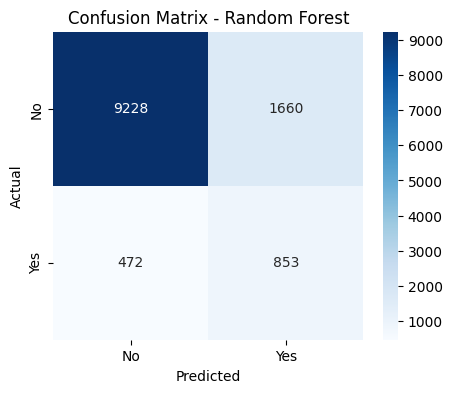

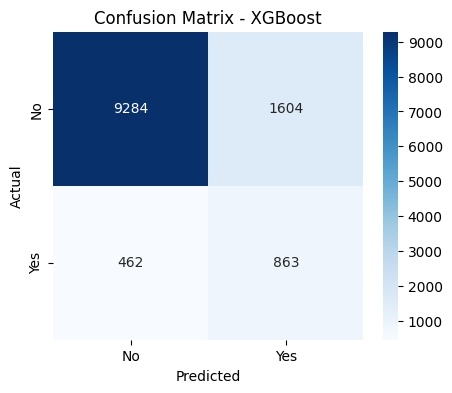

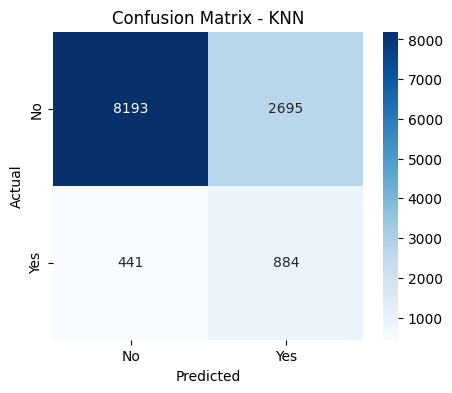

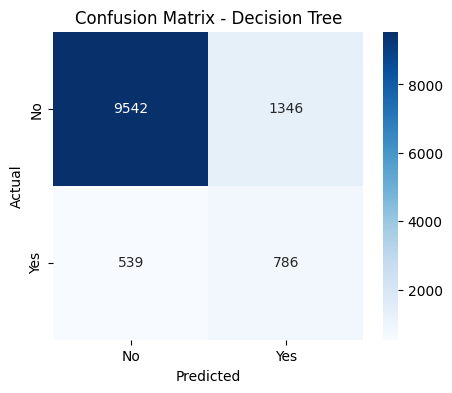

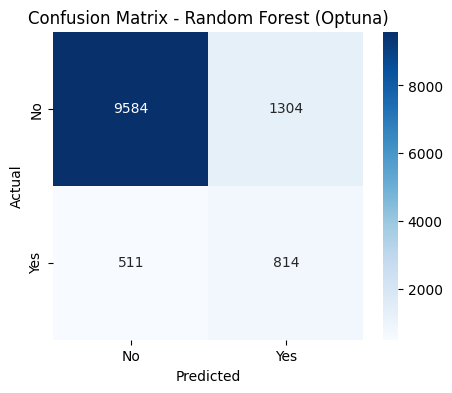

In [46]:
for result in results:
    cm = result["Confusion Matrix"]
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Confusion Matrix - {result['Model']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Feature Importance

In [47]:
def get_feature_names_from_pipeline(pipeline, df):
    col_trans = pipeline.named_steps["col_encode"]

    ohe_cols = ["day_of_week"]
    ordinal_cols = ["education"]

    all_cols = df.columns.tolist()

    ordinal_features = [col + "_ordinal" for col in ordinal_cols]

    ohe = col_trans.named_transformers_["day_ohe"]
    ohe_out = ohe.get_feature_names_out(ohe_cols).tolist()

    remainder = [
        col for col in all_cols 
        if col not in ordinal_cols and col not in ohe_cols
    ]


    return ordinal_features + ohe_out + remainder
pipeline.fit(X_train_raw)
feature_names = get_feature_names_from_pipeline(pipeline, X_train_raw)
feature_names, len(feature_names)



(['education_ordinal',
  'day_of_week_fri',
  'day_of_week_mon',
  'day_of_week_thu',
  'day_of_week_tue',
  'day_of_week_wed',
  'age',
  'job',
  'marital',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'poutcome',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'pdays_was_contacted',
  'pdays_clean'],
 26)

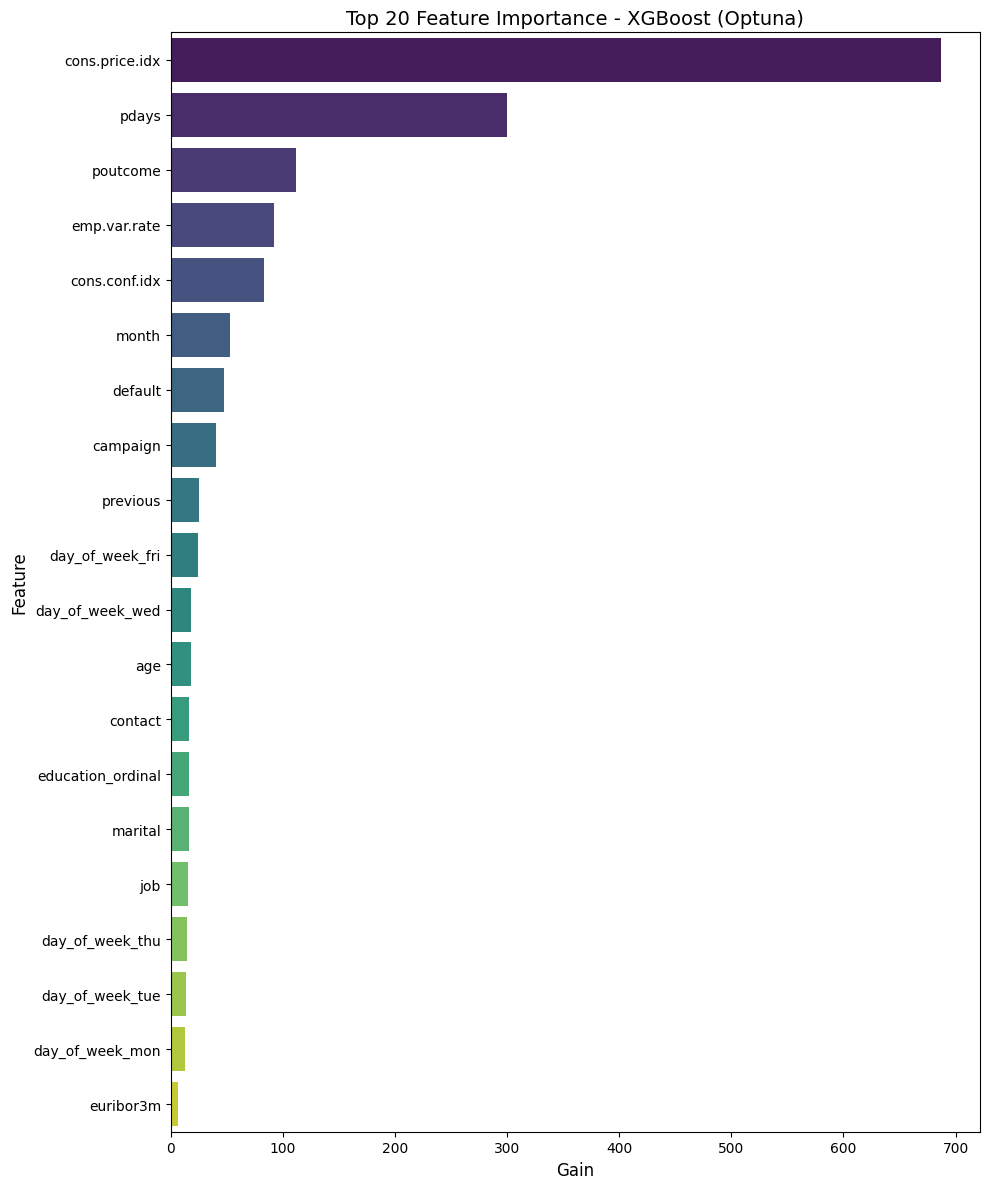

In [48]:
importance_gain = best_xgb.get_booster().get_score(importance_type='gain')

importance_list = []

for i, f in enumerate(feature_names):
    key = f"f{i}"
    importance_list.append(importance_gain.get(key, 0))

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance (Gain)': importance_list
}).sort_values(by="Importance (Gain)", ascending=False)

drop_cols = ["duration", "loan", "housing"]

df_feature_importance_filtered = df_feature_importance[
    ~df_feature_importance["Feature"].isin(drop_cols)
]

df_plot = df_feature_importance_filtered.head(20).copy()
df_plot["Feature"] = df_plot["Feature"].astype(str)
df_plot["Feature"] = df_plot["Feature"].apply(lambda x: "\n".join(textwrap.wrap(x, width=30)))

plt.figure(figsize=(10, 12))
sns.barplot(
    data=df_plot,
    x="Importance (Gain)", 
    y="Feature",
    palette="viridis"
)

plt.title("Top 20 Feature Importance - XGBoost (Optuna)", fontsize=14)
plt.xlabel("Gain", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# Save Model

In [49]:
best_model = best_xgb

joblib.dump(best_model, "best_model.pkl")
print("Model terbaik berhasil disimpan sebagai best_model.pkl")

Model terbaik berhasil disimpan sebagai best_model.pkl


In [50]:

with open("preprocessing_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline berhasil disimpan!")


Pipeline berhasil disimpan!


# Prediksi Probabilitas

In [51]:
# Load preprocessing pipeline
with open("preprocessing_pipeline.pkl", "rb") as f:
    pp = pickle.load(f)

# Load model
best_model = joblib.load("best_model.pkl")

print("Pipeline & model berhasil dimuat!")

Pipeline & model berhasil dimuat!


In [52]:
def add_required_columns(df):
    df = df.copy()

    # ---- BUAT KEMBALI KOLAM YANG DIBUAT SEBELUM PIPELINE ----
    df["pdays_was_contacted"] = (df["pdays"] != 999).astype(int)

    df["pdays_clean"] = df["pdays"].replace(999, np.nan)
    median = df["pdays_clean"].median()
    df["pdays_clean"] = df["pdays_clean"].fillna(median)

    return df

def preprocess_and_predict(df_raw, pipeline, model):

    # Tambah fitur tambahan dulu
    df_ready = add_required_columns(df_raw)

    # Transform dengan pipeline
    X_transformed = pipeline.transform(df_ready)

    # Predict probability
    proba = model.predict_proba(X_transformed)

    df_out = df_raw.copy()
    df_out["prob_no"] = proba[:, 0].round(3)
    df_out["prob_yes"] = proba[:, 1].round(3)

    return df_out, X_transformed




In [53]:
df_processed, X_scaled = preprocess_and_predict(df, pp, best_model)


In [54]:
df_processed

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,prob_no,prob_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.807,0.193
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.788,0.212
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.791,0.209
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.784,0.216
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.784,0.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0.199,0.801
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0.167,0.833
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0.188,0.812
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0.171,0.829


In [55]:
df_processed.to_csv("probabilitas.csv", index=False)

In [56]:
df_y1 = df_processed[df_processed['y'] == 1]
df_y1.to_csv('probabilitas_y1.csv', index=False)